## Linear Regression 

_Mise en place_ :
- train and test the model to predict a new outcome og future employees
- test the quality of the model. 

### imports


In [ ]:
# for data storage and manipulation
import pandas
import numpy
# for diagrams and plotting
import matplotlib.pyplot as plt
import seaborn as sns
# for ML/machine learning methods and algorithms
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
# for serialization and deserialization of data from and to a file
import pickle
# for normalization of data
from sklearn.preprocessing import MinMaxScaler


### load the data 

In [33]:
DFemployeeData = pandas.read_csv('../data/Emp-Attrition-Initial-Clean.csv')

In [34]:
DFemployeeData.shape

(1470, 31)

In [35]:
DFemployeeData.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,0,1102,0,1,2,0,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,1,1,279,1,8,1,0,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,0,0,1373,1,2,2,1,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1,1392,1,3,4,0,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,1,0,591,1,2,1,2,1,1,...,3,4,1,6,3,3,2,2,2,2


In [36]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(DFemployeeData)
# colimns = DFemployeeData.columns makes sure that its the original column names
normalizedEmployeeData = pandas.DataFrame(scaler.fit_transform(DFemployeeData), columns=DFemployeeData.columns)

### normalize the data 

In [37]:
normalizedEmployeeData.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,0.0,0.0,0.715820,0.0,0.000000,0.25,0.0,0.333333,0.0,...,0.0,0.000000,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118
1,0.738095,1.0,0.5,0.126700,0.5,0.250000,0.00,0.0,0.666667,1.0,...,1.0,1.000000,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765
2,0.452381,0.0,0.0,0.909807,0.5,0.035714,0.25,0.2,1.000000,1.0,...,0.0,0.333333,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000
3,0.357143,1.0,0.5,0.923407,0.5,0.071429,0.75,0.0,1.000000,0.0,...,0.0,0.666667,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000
4,0.214286,1.0,0.0,0.350036,0.5,0.035714,0.00,0.4,0.000000,1.0,...,0.0,1.000000,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647


In [38]:
list(DFemployeeData)

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

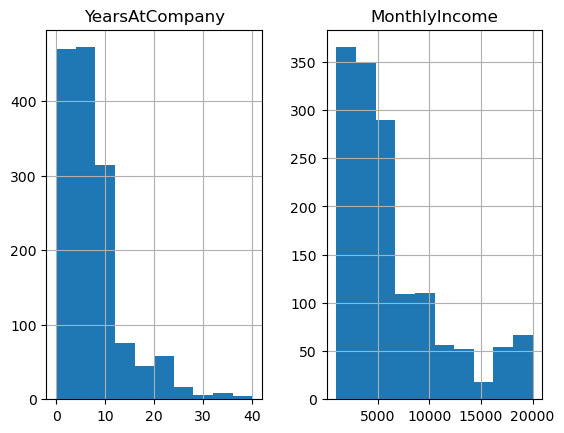

In [39]:
hist = DFemployeeData[['YearsAtCompany', 'MonthlyIncome']].hist()

C:\Users\vaang\AppData\Local\Temp\ipykernel_11568\4016877782.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(DFemployeeData['YearsAtCompany'],  label='MonthlyIncome', norm_hist=True)


<Axes: xlabel='YearsAtCompany', ylabel='Density'>

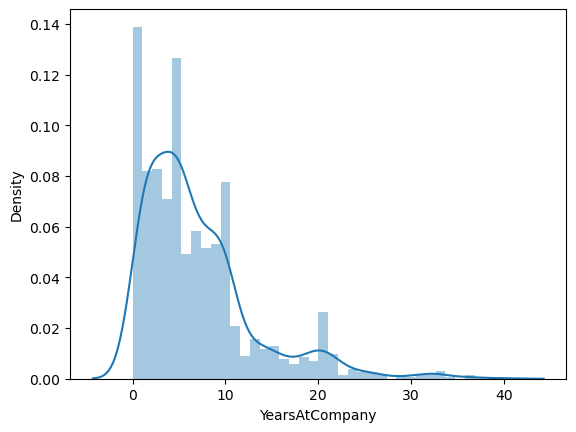

In [40]:
# to get a overview of how many are in each category
sns.distplot(DFemployeeData['YearsAtCompany'],  label='MonthlyIncome', norm_hist=True) 

In [41]:
DFemployeeData[["YearsAtCompany", "MonthlyIncome"]].describe()

,YearsAtCompany,MonthlyIncome
count,1470.000000,1470.000000
mean,7.008163,6502.931293
std,6.126525,4707.956783
min,0.000000,1009.000000
25%,3.000000,2911.000000
50%,5.000000,4919.000000
75%,9.000000,8379.000000
max,40.000000,19999.000000


#### checking the outliers

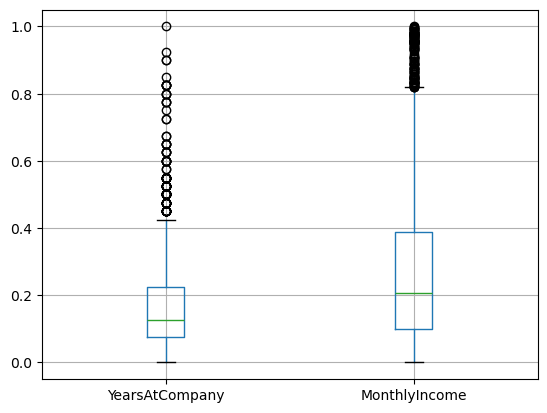

In [42]:

# using the normalized data here. because the income is such a high number in relation to the years at the company
boxplot = normalizedEmployeeData.boxplot(column=['YearsAtCompany', 'MonthlyIncome']) 

#### Removing the outliers. 
##### its makes our future model more precise. because we want our predictions to be based on the most data and not the few that have a very high or very low salary

In [56]:
upper_limitInc = DFemployeeData["MonthlyIncome"].quantile(0.95) 
lower_limitInc = DFemployeeData["MonthlyIncome"].quantile(0.05)
upper_limitYear = DFemployeeData["YearsAtCompany"].quantile(0.95) 
lower_limitYear = DFemployeeData["YearsAtCompany"].quantile(0.05)


no_outliers = DFemployeeData[(DFemployeeData["MonthlyIncome"] < upper_limitInc) & (DFemployeeData["MonthlyIncome"] > lower_limitInc) ]
no_outliers = no_outliers[(no_outliers["YearsAtCompany"] < upper_limitYear) & (no_outliers["YearsAtCompany"] > lower_limitYear) ]

no_outliers

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,0,1102,0,1,2,0,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,1,1,279,1,8,1,0,3,1,...,4,4,1,10,3,3,10,7,1,7
3,33,1,1,1392,1,3,4,0,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,1,0,591,1,2,1,2,1,1,...,3,4,1,6,3,3,2,2,2,2
5,32,1,1,1005,1,2,2,0,4,1,...,3,3,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,1,884,1,23,2,2,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,1,0,613,1,6,1,2,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,1,0,155,1,4,3,0,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,1,1,1023,0,2,3,2,4,1,...,3,4,0,17,3,2,9,6,0,8


In [57]:
outliers = pandas.concat([DFemployeeData, no_outliers]).drop_duplicates(keep=False)
outliers



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2,37,0,0,1373,1,2,2,1,4,1,...,3,2,0,7,3,3,0,0,0,0
6,59,1,0,1324,1,3,3,2,3,0,...,4,1,3,12,3,2,1,0,0,0
7,30,1,0,1358,1,24,1,0,4,1,...,4,2,1,1,2,3,1,0,0,0
14,28,0,0,103,1,24,3,0,3,1,...,3,2,0,6,4,3,4,2,0,3
17,22,1,2,1123,1,16,2,2,4,1,...,3,2,2,1,2,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,0,1,638,0,9,3,3,4,1,...,3,1,1,1,3,2,1,0,1,0
1443,42,1,0,300,1,2,3,0,1,1,...,3,1,0,24,2,2,22,6,4,14
1445,41,1,0,582,1,28,4,0,1,0,...,4,3,1,21,3,3,20,7,0,10
1457,40,1,0,1194,1,2,4,2,3,0,...,3,2,3,20,2,3,5,3,0,2


In [59]:
DFemployeeDataWithOutliers = no_outliers[["MonthlyIncome", "YearsAtCompany"]].corr()

### heat map with correlation between MonthlyIncome and YearsAtCompany. with no outliers

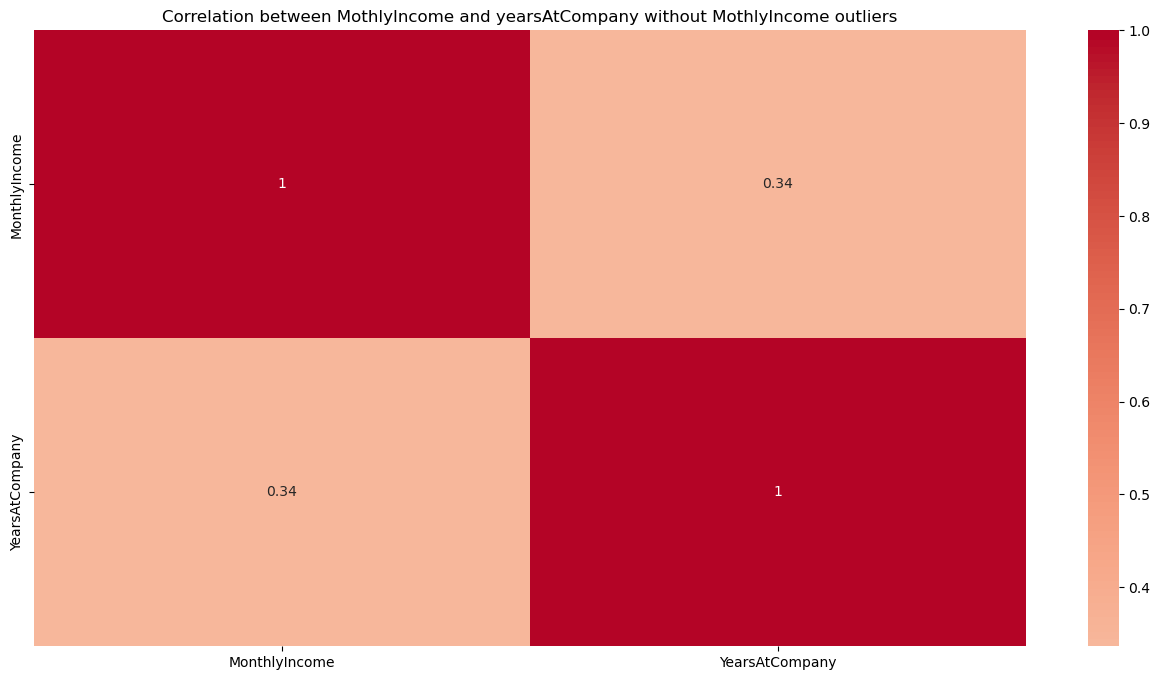

In [60]:
plt.figure(figsize=(16,8)) # makes the diagram bigger.
sns.heatmap(DFemployeeDataWithOutliers, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between MothlyIncome and yearsAtCompany without MothlyIncome outliers')
plt.show()

### conclusion there is no correlation in the MonthlyIncome and YearsatCompany woth no outliers

In [ ]:
DFemployeeDataCorrelation = DFemployeeData[["MonthlyIncome", "YearsAtCompany"]].corr()

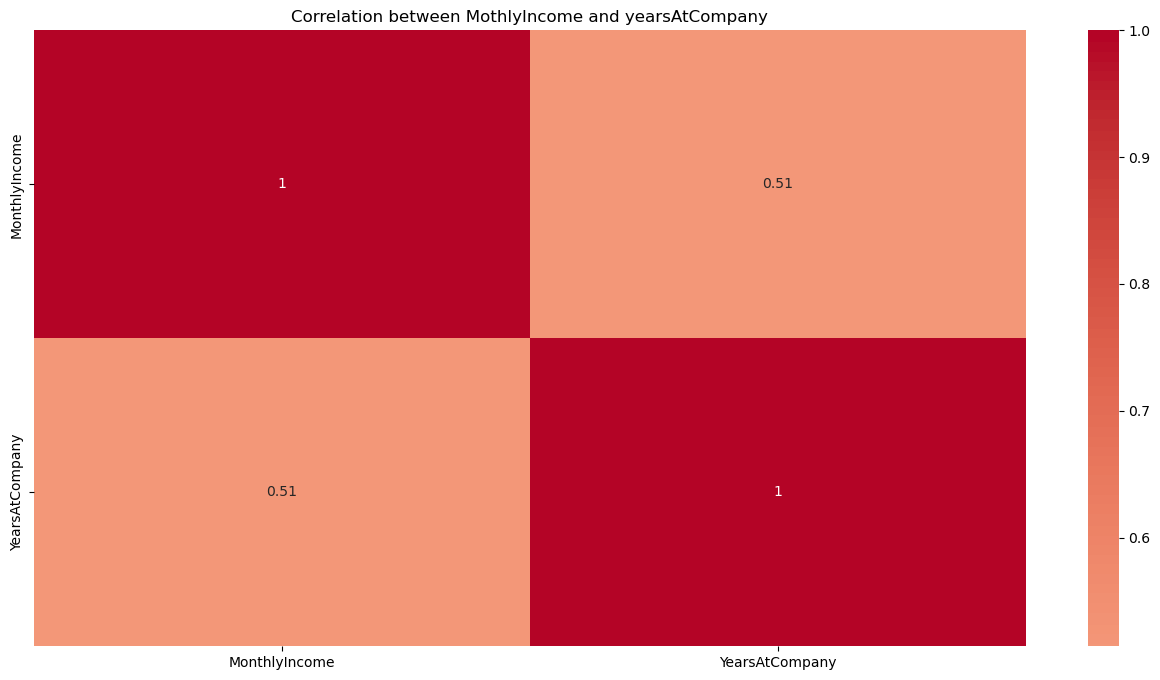

In [62]:
plt.figure(figsize=(16,8)) # makes the diagram bigger.
sns.heatmap(DFemployeeDataCorrelation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between MothlyIncome and yearsAtCompany')
plt.show()

### Conclusion: with all the outliers with correlation is moderate positive. but not very precise to predict 

In [92]:
# Select columns that might influence MonthlyIncome
cols_to_check = [
    "MonthlyIncome",
    "Age",
    "Education",
    "JobLevel",
    "TotalWorkingYears",
    "YearsAtCompany",
    "PerformanceRating",
    "PercentSalaryHike",
    "NumCompaniesWorked",
    "YearsInCurrentRole",
    "YearsSinceLastPromotion",
    "YearsWithCurrManager"
]

# Create a new DataFrame with only those columns
DFemployeeDataCheckCorr = DFemployeeData[cols_to_check].corr()

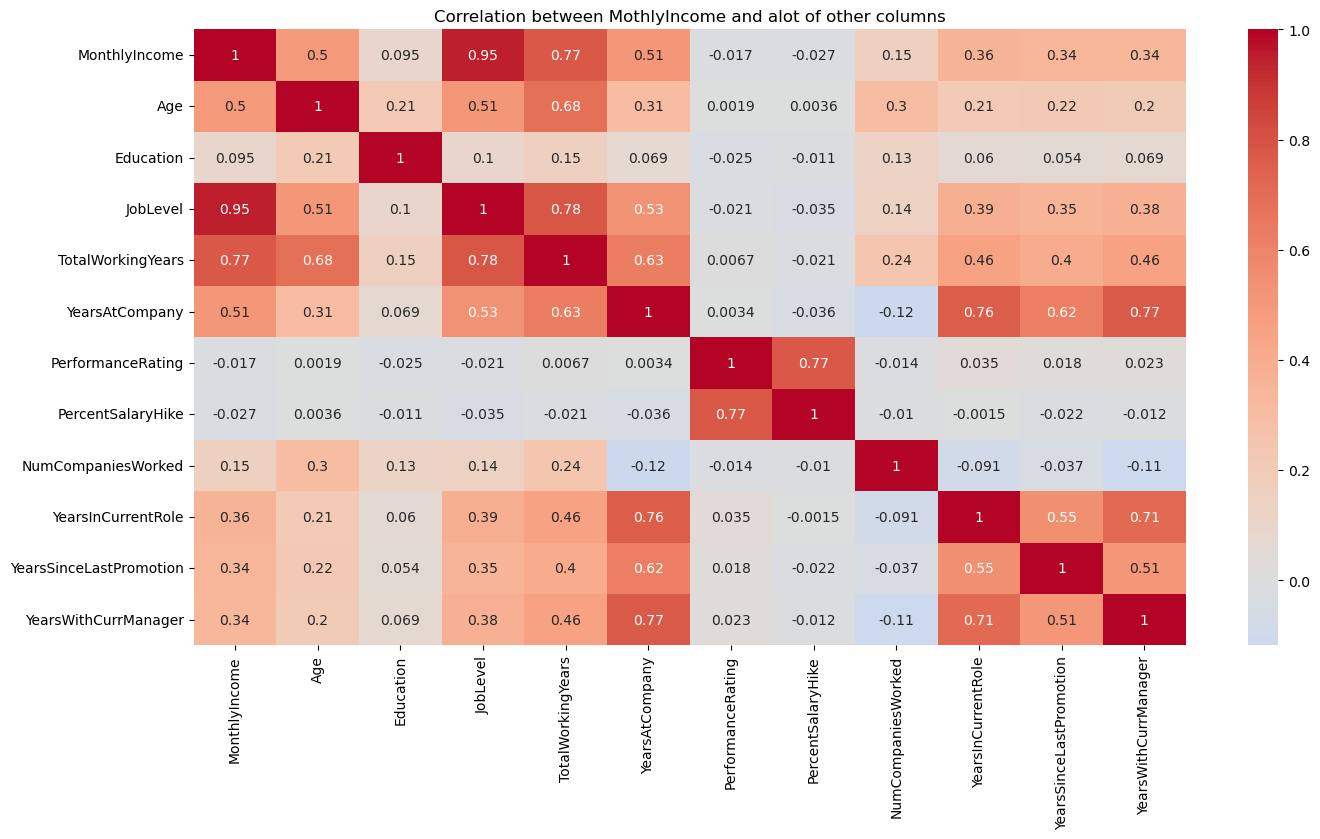

In [93]:
plt.figure(figsize=(16,8)) # makes the diagram bigger.
sns.heatmap(DFemployeeDataCheckCorr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between MothlyIncome and alot of other columns')
plt.show()

### Conclusion "JobLevel" and "TotalWorkingYears" have the most impact on Monthlyincome

In [106]:
# Features and target. X = feature, y = target
X = DFemployeeData[["TotalWorkingYears"]]  # Removed JobLevel to get a better look at years and income
y = DFemployeeData["MonthlyIncome"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [107]:
#  Predict and Validate
y_pred = model.predict(X_test)


In [108]:
print("R² score:", sm.r2_score(y_test, y_pred))
print("MAE:", sm.mean_absolute_error(y_test, y_pred))

R² score: 0.5964229412874164
MAE: 2233.825203946931


### with both "Joblevet" and "TotalWorkingYears"
### R^2 score 0.89 = The model explains 89% of the variation in MonthlyIncome. this is good
### MAE 1169 = on average the income can be 1170 $ lower or higher from the true income

In [109]:
a = model.coef_ # the slope of the line = how much monthly income increases with each unit from the features/independent variables(Joblevel and TotalWorkingYears)
b = model.intercept_ # the y intercept

C:\Users\vaang\AppData\Local\Temp\ipykernel_11568\2169468052.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X["TotalWorkingYears"], y, cmap='viridis')


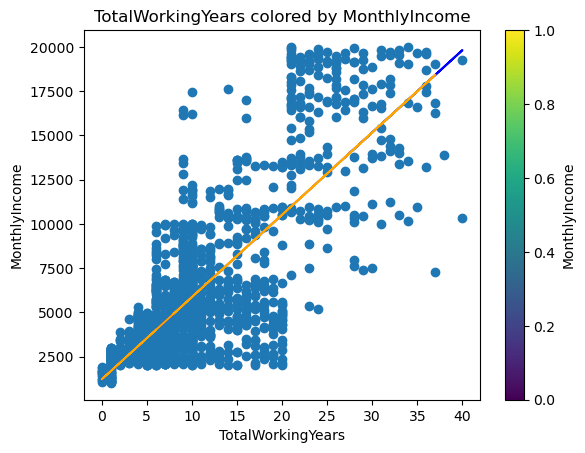

In [110]:
#Visualize the linear regression
plt.scatter(X["TotalWorkingYears"], y, cmap='viridis')
plt.colorbar(label='MonthlyIncome')
plt.xlabel('TotalWorkingYears')
plt.ylabel('MonthlyIncome')
plt.title('TotalWorkingYears colored by MonthlyIncome')
plt.plot(X_train, a*X_train + b, color='blue')
plt.plot(X_test, y_pred, color='orange')
plt.show()



### conclusion : The regression line (orange) fits the data quite well, showing that the model can predict income based on experience.

### conclusion : to get more precise prediction. we should make a Multiple linear regression with "JobLevel" and "TotalWorkingYears" as the independent variables. since the R^2 model would have been 0.89 instead of 0.59 (with only "TotalWorkingYears") 
